In [4]:
import torch
import matplotlib.pyplot as plt
from basic_pipeline import get_data, get_device
# from train import validate, get_generators, get_device

In [5]:
# device = get_device()
training_directory = ["/media/juanpablo/DATASETS/dataset/360_noshake_1/"]
test_directory = ["/media/juanpablo/DATASETS/dataset/valid/"]

device = torch.device("cpu")
train_dl, valid_dl = get_data(training_directory, test_directory, 16)
model = torch.load('./m2').to(device)

In [6]:
batches = iter(train_dl)

In [7]:
batch = batches.next()
game_batch = batch[0]
depth_batch = batch[1]

print(game_batch.shape)
print(depth_batch.shape)

torch.Size([16, 3, 224, 224])
torch.Size([16, 1, 224, 224])


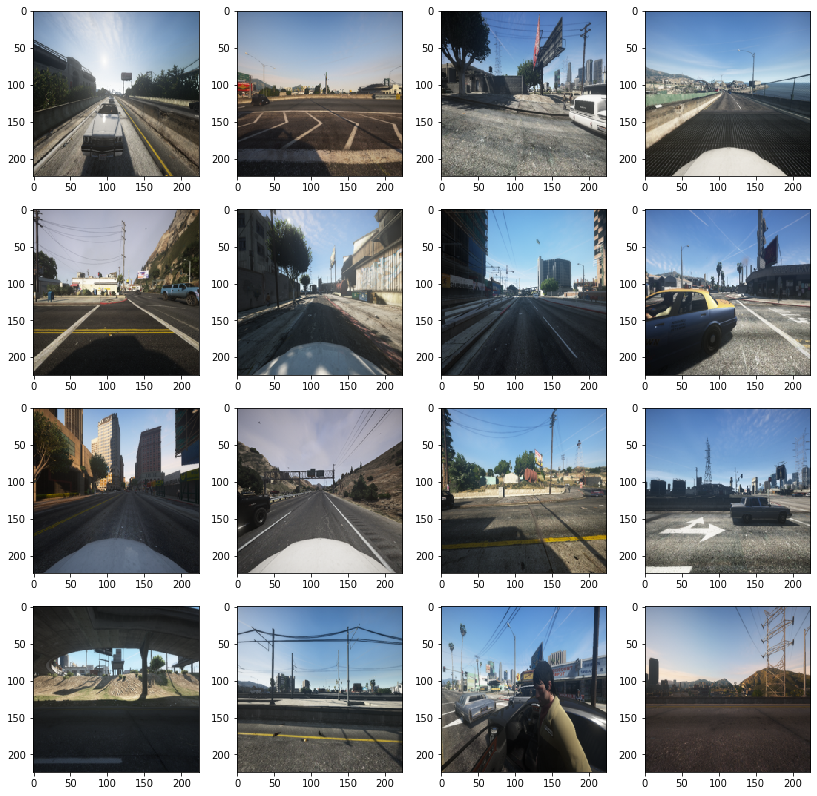

In [8]:
w=10
h=10
fig=plt.figure(figsize=(14, 14))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = game_batch[i-1].permute(1, 2, 0)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

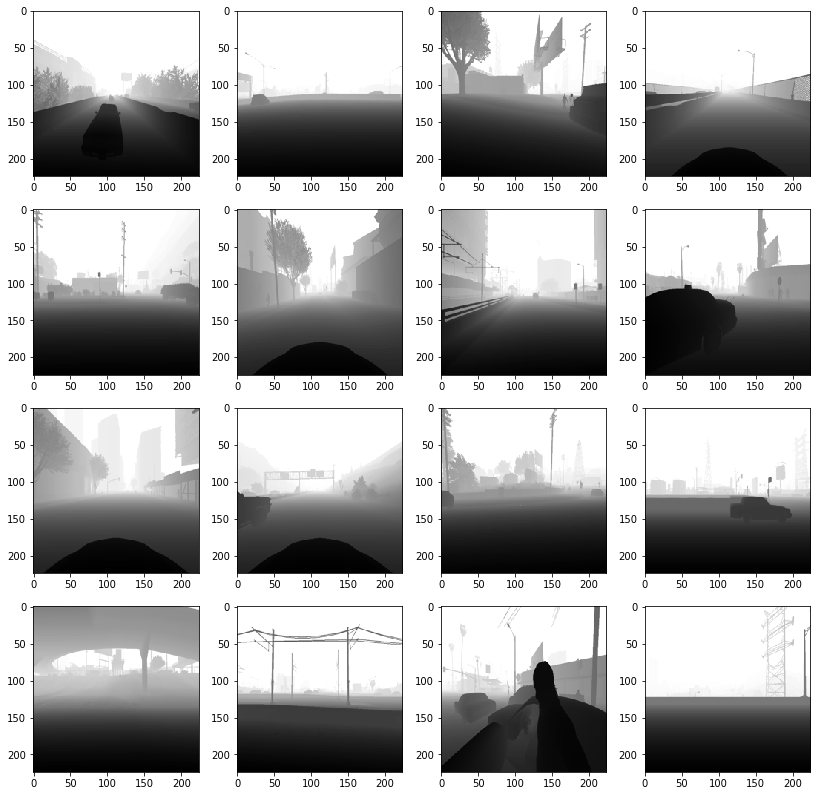

In [9]:
w=10
h=10
fig=plt.figure(figsize=(14, 14))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = depth_batch[i-1][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

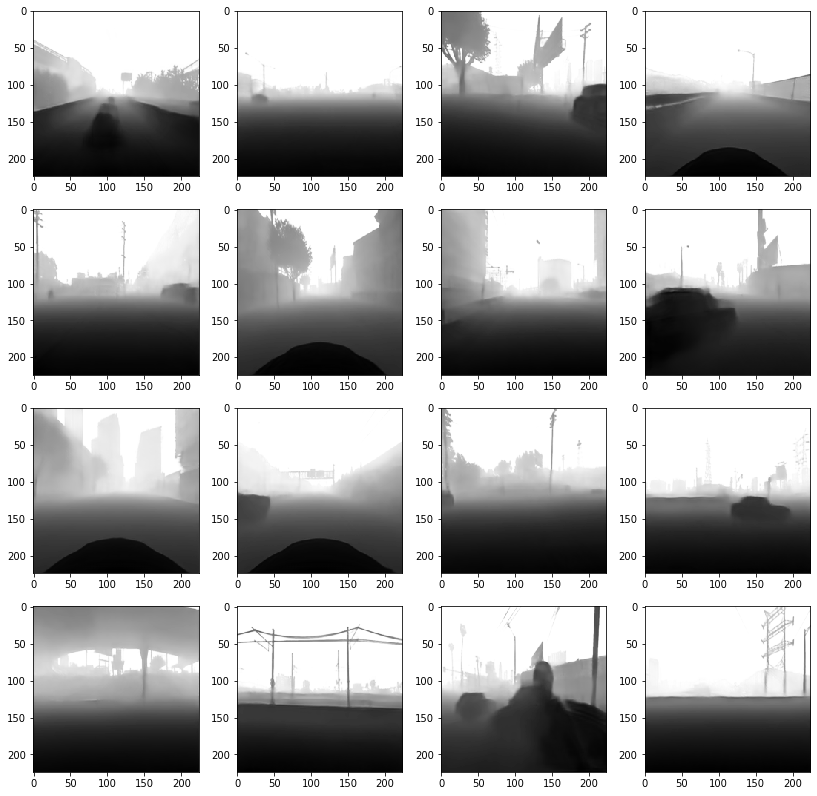

In [11]:
predictions = model(game_batch).detach()

w=10
h=10
fig=plt.figure(figsize=(14, 14))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = predictions[i-1][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [1]:
################
#IRL
################

In [2]:
import PIL
from PIL import Image
from torchvision import transforms

In [3]:
pil_image = Image.open("/media/juanpablo/DATASETS/IRL/irl01.jpg")

transformations = transforms.Compose([
    transforms.ToTensor(),
])

image = transformations(pil_image).cpu()

In [4]:
with torch.no_grad():
    predictions = model(image.view([1, 3, 224, 224]))
    
plt.imshow(predictions[0][0].detach().cpu().numpy(), cmap='gray')

NameError: name 'torch' is not defined